In [21]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

data = pd.read_json('overviews_processed.json', orient='records', lines=True)
data

,Unnamed: 0,id,original_title,release_date,runtime,genres,budget,revenue,vote_average,vote_count,popularity,overview,overview_punct_sep,overview_tokenize,overview_sent_tokenize,overview_lower,overview_stopwords,overview_stemmed,overview_pos
0,0,1891,The Empire Strikes Back,1980-05-20,124,"Adventure,Action,Fiction",18000000,538400000,8.4,14567,26.960,"The epic saga continues as Luke Skywalker, in ...","[The, epic, saga, continues, as, Luke, Skywalk...","[The, epic, saga, continues, as, Luke, Skywalk...","[[The, epic, saga, continues, as, Luke, Skywal...","[the, epic, saga, continues, as, luke, skywalk...","[epic, saga, continues, luke, skywalker, ,, ho...","[the, epic, saga, continu, as, luke, skywalk, ...","[[the, DT], [epic, NN], [saga, NN], [continues..."
1,1,8536,Superman II,1980-12-04,127,"Fiction,Action,Adventure",54000000,190458706,6.7,1874,16.237,Three escaped criminals from the planet Krypto...,"[Three, escaped, criminals, from, the, planet,...","[Three, escaped, criminals, from, the, planet,...","[[Three, escaped, criminals, from, the, planet...","[three, escaped, criminals, from, the, planet,...","[three, escaped, criminals, planet, krypton, t...","[three, escap, crimin, from, the, planet, kryp...","[[three, CD], [escaped, JJ], [criminals, NNS],..."
2,2,525,The Blues Brothers,1980-06-16,133,"Music,Comedy,Action,Crime",27000000,115229890,7.8,3498,12.911,"Jake Blues, just released from prison, puts hi...","[Jake, Blues, ,, just, released, from, prison,...","[Jake, Blues, ,, just, released, from, prison,...","[[Jake, Blues, ,, just, released, from, prison...","[jake, blues, ,, just, released, from, prison,...","[jake, blues, ,, released, prison, ,, puts, ol...","[jake, blue, ,, just, releas, from, prison, ,,...","[[jake, NN], [blues, NNS], [,, ,], [just, RB],..."
3,3,19494,Nine to Five,1980-12-18,110,Comedy,10000000,103300000,6.9,380,8.547,Frank Hart is a pig. He takes advantage in the...,"[Frank, Hart, is, a, pig, ., He, takes, advant...","[Frank, Hart, is, a, pig, ., He, takes, advant...","[[Frank, Hart, is, a, pig, .], [He, takes, adv...","[frank, hart, is, a, pig, ., he, takes, advant...","[frank, hart, pig, ., takes, advantage, grosse...","[frank, hart, is, a, pig, ., he, take, advanta...","[[frank, JJ], [hart, NN], [is, VBZ], [a, DT], ..."
4,4,21629,Stir Crazy,1980-12-12,111,Comedy,10000000,101300000,6.5,345,11.162,New Yorkers Skip Donahue and Harry Monroe have...,"[New, Yorkers, Skip, Donahue, and, Harry, Monr...","[New, Yorkers, Skip, Donahue, and, Harry, Monr...","[[New, Yorkers, Skip, Donahue, and, Harry, Mon...","[new, yorkers, skip, donahue, and, harry, monr...","[new, yorkers, skip, donahue, harry, monroe, j...","[new, yorker, skip, donahu, and, harri, monro,...","[[new, JJ], [yorkers, NNS], [skip, VBP], [dona..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7964,9951,858015,Dashcam,2022-06-03,80,"Horror,Thriller",100000,58156,5.3,32,7.099,"At the start of the pandemic, an indulgent and...","[At, the, start, of, the, pandemic, ,, an, ind...","[At, the, start, of, the, pandemic, ,, an, ind...","[[At, the, start, of, the, pandemic, ,, an, in...","[at, the, start, of, the, pandemic, ,, an, ind...","[start, pandemic, ,, indulgent, self-deluded, ...","[at, the, start, of, the, pandem, ,, an, indul...","[[at, IN], [the, DT], [start, NN], [of, IN], [..."
7965,9957,989685,Nobody Panic!,2022-06-01,124,"Comedy,Mystery",50,1687,10.0,1,0.600,When the star of a high school play drops dead...,"[When, the, star, of, a, high, school, play, d...","[When, the, star, of, a, high, school, play, d...","[[When, the, star, of, a, high, school, play, ...","[when, the, star, of, a, high, school, play, d...","[star, high, school, play, drops, dead, middle...","[when, the, star, of, a, high, school, play, d...","[[when, WRB], [the, DT], [star, NN], [of, IN],..."
7966,9974,930020,Night Vacation 2,2022-09-03,105,"Comedy,Adventure,Crime,Action",1000,100,9.0,1,2.697,The crew goes on a long vacation to g

In [22]:
data['wordcount'] = data.overview_punct_sep.apply(lambda x: [ word for word in x if not re.fullmatch(r'\W+', word)])
data['wordcount'] = data.wordcount.apply(lambda x: len(x))
data['sentence_wordcount'] = data.overview_sent_tokenize.apply(lambda x: [[ word for word in sent if not re.fullmatch(r'\W+', word)] for sent in x])

data['sentence_wordcount'] = data.overview_sent_tokenize.apply(lambda x: [len(sent) for sent in x])
data['avg_sent_length'] = data.sentence_wordcount.apply(lambda x: np.mean(x))

data

,Unnamed: 0,id,original_title,release_date,runtime,genres,budget,revenue,vote_average,vote_count,...,overview_punct_sep,overview_tokenize,overview_sent_tokenize,overview_lower,overview_stopwords,overview_stemmed,overview_pos,wordcount,sentence_wordcount,avg_sent_length
0,0,1891,The Empire Strikes Back,1980-05-20,124,"Adventure,Action,Fiction",18000000,538400000,8.4,14567,...,"[The, epic, saga, continues, as, Luke, Skywalk...","[The, epic, saga, continues, as, Luke, Skywalk...","[[The, epic, saga, continues, as, Luke, Skywal...","[the, epic, saga, continues, as, luke, skywalk...","[epic, saga, continues, luke, skywalker, ,, ho...","[the, epic, saga, continu, as, luke, skywalk, ...","[[the, DT], [epic, NN], [saga, NN], [continues...",60,"[28, 12, 30]",23.333333
1,1,8536,Superman II,1980-12-04,127,"Fiction,Action,Adventure",54000000,190458706,6.7,1874,...,"[Three, escaped, criminals, from, the, planet,...","[Three, escaped, criminals, from, the, planet,...","[[Three, escaped, criminals, from, the, planet...","[three, escaped, criminals, from, the, planet,...","[three, escaped, criminals, planet, krypton, t...","[three, escap, crimin, from, the, planet, kryp...","[[three, CD], [escaped, JJ], [criminals, NNS],...",61,"[15, 26, 27]",22.666667
2,2,525,The Blues Brothers,1980-06-16,133,"Music,Comedy,Action,Crime",27000000,115229890,7.8,3498,...,"[Jake, Blues, ,, just, released, from, prison,...","[Jake, Blues, ,, just, released, from, prison,...","[[Jake, Blues, ,, just, released, from, prison...","[jake, blues, ,, just, released, from, prison,...","[jake, blues, ,, released, prison, ,, puts, ol...","[jake, blue, ,, just, releas, from, prison, ,,...","[[jake, NN], [blues, NNS], [,, ,], [just, RB],...",25,[28],28.000000
3,3,19494,Nine to Five,1980-12-18,110,Comedy,10000000,103300000,6.9,380,...,"[Frank, Hart, is, a, pig, ., He, takes, advant...","[Frank, Hart, is, a, pig, ., He, takes, advant...","[[Frank, Hart, is, a, pig, .], [He, takes, adv...","[frank, hart, is, a, pig, ., he, takes, advant...","[frank, hart, pig, ., takes, advantage, grosse...","[frank, hart, is, a, pig, ., he, take, advanta...","[[frank, JJ], [hart, NN], [is, VBZ], [a, DT], ...",50,"[6, 15, 33]",18.000000
4,4,21629,Stir Crazy,1980-12-12,111,Comedy,10000000,101300000,6.5,345,...,"[New, Yorkers, Skip, Donahue, and, Harry, Monr...","[New, Yorkers, Skip, Donahue, and, Harry, Monr...","[[New, Yorkers, Skip, Donahue, and, Harry, Mon...","[new, yorkers, skip, donahue, and, harry, monr...","[new, yorkers, skip, donahue, harry, monroe, j...","[new, yorker, skip, donahu, and, harri, monro,...","[[new, JJ], [yorkers, NNS], [skip, VBP], [dona...",60,"[39, 28]",33.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7964,9951,858015,Dashcam,2022-06-03,80,"Horror,Thriller",100000,58156,5.3,32,...,"[At, the, start, of, the, pandemic, ,, an, ind...","[At, the, start, of, the, pandemic, ,, an, ind...","[[At, the, start, of, the, pandemic, ,, an, in...","[at, the, start, of, the, pandemic, ,, an, ind...","[start, pandemic, ,, indulgent, self-deluded, ...","[at, the, start, of, the, pandem, ,, an, indul...","[[at, IN], [the, DT], [start, NN], [of, IN], [...",40,[45],45.000000
7965,9957,989685,Nobody Panic!,2022-06-01,124,"Comedy,Mystery",50,1687,10.0,1,...,"[When, the, star, of, a, high, school, play, d...","[When, the, star, of, a, high, school, play, d...","[[When, the, star, of, a, high, school, play, ...","[when, the, star, of, a, high, school, play, d...","[star, high, school, play, drops, dead, middle...","[when, the, star, of, a, high, school, play, d...","[[when, WRB], [the, DT], [star, NN], [of, IN],...",59,"[35, 23, 6]",21.333333
7966,9974,930020,Night Vacation 2,2022-09-03,105,"Comedy,Adventure,Crime,Action",1000,100,9.0,1,...,"[The, crew, goes, on, a, long, vacation, to, g...","[The, crew, goes, on, a, long, vacation, to, g...","[[The, crew, goes, on, a, long, vacation, to, ...","[the, crew, goes, on, a, long, vacation, to, g...

In [23]:
data['adjectives'] = data.overview_pos.apply(lambda x: [word for word, pos in x if pos=='JJ'])
data['nouns'] = data.overview_pos.apply(lambda x: [word for word, pos in x if pos.startswith('NN')])
data['punctuation'] = data.overview_punct_sep.apply(lambda x: [word for word in x if re.fullmatch(r'\W+', word)])

data['adjective_ratio'] = data.apply (lambda row: len(row.adjectives) / row.wordcount, axis=1)
data['noun_ratio'] = data.apply (lambda row: len(row.nouns) / row.wordcount, axis=1)
data['ellipses'] = data.punctuation.apply(lambda x: len([punct for punct in x if re.fullmatch('...', punct)]))
data['exclamation_points'] = data.punctuation.apply(lambda x: len([punct for punct in x if re.fullmatch('!', punct)]))
data['unusual_punctuation'] = data.punctuation.apply(lambda x:[punct for punct in x if not re.fullmatch('[.|,]', punct)])
data['unusual_punctuation_count'] = data.unusual_punctuation.apply(lambda x: len(x))
with pd.option_context('display.max_colwidth', 1000):
  display(data)

,Unnamed: 0,id,original_title,release_date,runtime,genres,budget,revenue,vote_average,vote_count,...,avg_sent_length,adjectives,nouns,punctuation,adjective_ratio,noun_ratio,ellipses,exclamation_points,unusual_punctuation,unusual_punctuation_count
0,0,1891,The Empire Strikes Back,1980-05-20,124,"Adventure,Action,Fiction",18000000,538400000,8.4,14567,...,23.333333,"[evil, galactic, darth, determined, rebel, cocky, c-3po, r2-d2, various]","[epic, saga, luke, skywalker, hopes, empire, ways, jedi, master, yoda, vader, luke, leader, princess, leia, han, solo, chewbacca, droids, stages, capture, betrayal, despair]","[,, ,, ., ., ,, ,, ,, ,, ,, .]",0.150000,0.383333,0,0,[],0
1,1,8536,Superman II,1980-12-04,127,"Fiction,Action,Adventure",54000000,190458706,6.7,1874,...,22.666667,"[escaped, general, white, lex, superman, human]","[criminals, planet, krypton, man, steel, mettle, zod, kryptonians, control, house, partner, luthor, superman, world, order, responsibility, planet]","[., ,, ., ,, ,, .]",0.098361,0.278689,0,0,[],0
2,2,525,The Blues Brothers,1980-06-16,133,"Music,Comedy,Action,Crime",27000000,115229890,7.8,3498,...,28.000000,[old],"[jake, blues, prison, band, catholic, home, brother, elwood]","[,, ,, .]",0.040000,0.320000,0,0,[],0
3,3,19494,Nine to Five,1980-12-18,110,Comedy,10000000,103300000,6.9,380,...,18.000000,"[frank, own, long]","[hart, pig, advantage, manner, women, assistants, house, control, department, productivity, leaps, hart]","[., ., ,, ?]",0.060000,0.240000,0,0,[?],1
4,4,21629,Stir Crazy,1980-12-12,111,Comedy,10000000,101300000,6.5,345,...,33.500000,[new],"[yorkers, donahue, harry, monroe, jobs, prospects, city, work, jobs, woodpecker, costumes, opening, bank, feathery, costumes, bank, robbery, employment, —, prison]","[,, ,, ., ,, —, .]",0.016667,0.333333,0,0,[—],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7964,9951,858015,Dashcam,2022-06-03,80,"Horror,Thriller",100000,58156,5.3,32,...,45.000000,"[self-deluded, musician, fateful, elderly]","[start, pandemic, indulgent, livestreaming, improv, abandons, london, ex-bandmate, car, decision, ride, woman]","[,, ., ,, ,, .]",0.100000,0.300000,0,0,[],0
7965,9957,989685,Nobody Panic!,2022-06-01,124,"Comedy,Mystery",50,1687,10.0,1,...,21.333333,"[high, detective, eccentric]","[star, school, play, drops, middle, performance, charge, order, culprit, cast, crew, tape, recorder, notepad, clock, ticking, work, cut, murder]","[,, ., ,, ., ?]",0.050847,0.322034,0,0,[?],1
7966,9974,930020,Night Vacation 2,2022-09-03,105,"Comedy,Adventure,Crime,Action",1000,100,9.0,1,...,39.000000,"[long, mysterious]","[crew, vacation, building, house, conflicts, criminal, curiosity, vorput, parents]","["", "",, ,, ,, ,, ,]",0.064516,0.290323,0,0,"["", "",]",2
7967,9975,1014358,Spymate 2,2022-08-19,72,"Drama,Action,Comedy,Thriller",10,50,10.0,1,...,10.800000,[chimpossible],"[syndicate, minkey, family, criminals, scum, bananas, drinking, company, president, paul, minkey, mission, family, everything]","[., ., ., ., ?]",0.021739,0.304348,0,0,[?],1


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7969 entries, 0 to 7968
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 7969 non-null   int64  
 1   id                         7969 non-null   int64  
 2   original_title             7969 non-null   object 
 3   release_date               7969 non-null   object 
 4   runtime                    7969 non-null   int64  
 5   genres                     7950 non-null   object 
 6   budget                     7969 non-null   int64  
 7   revenue                    7969 non-null   int64  
 8   vote_average               7969 non-null   float64
 9   vote_count                 7969 non-null   int64  
 10  popularity                 7969 non-null   float64
 11  overview                   7969 non-null   object 
 12  overview_punct_sep         7969 non-null   object 
 13  overview_tokenize          7969 non-null   objec

In [25]:
data_trimmed = data.drop(['overview_punct_sep', 'overview_tokenize', 'overview_sent_tokenize', 'overview_lower', 'overview_stopwords', 'overview_stemmed', 'overview_pos', 'sentence_wordcount', 'punctuation'], axis=1)
data_trimmed

,Unnamed: 0,id,original_title,release_date,runtime,genres,budget,revenue,vote_average,vote_count,...,wordcount,avg_sent_length,adjectives,nouns,adjective_ratio,noun_ratio,ellipses,exclamation_points,unusual_punctuation,unusual_punctuation_count
0,0,1891,The Empire Strikes Back,1980-05-20,124,"Adventure,Action,Fiction",18000000,538400000,8.4,14567,...,60,23.333333,"[evil, galactic, darth, determined, rebel, coc...","[epic, saga, luke, skywalker, hopes, empire, w...",0.150000,0.383333,0,0,[],0
1,1,8536,Superman II,1980-12-04,127,"Fiction,Action,Adventure",54000000,190458706,6.7,1874,...,61,22.666667,"[escaped, general, white, lex, superman, human]","[criminals, planet, krypton, man, steel, mettl...",0.098361,0.278689,0,0,[],0
2,2,525,The Blues Brothers,1980-06-16,133,"Music,Comedy,Action,Crime",27000000,115229890,7.8,3498,...,25,28.000000,[old],"[jake, blues, prison, band, catholic, home, br...",0.040000,0.320000,0,0,[],0
3,3,19494,Nine to Five,1980-12-18,110,Comedy,10000000,103300000,6.9,380,...,50,18.000000,"[frank, own, long]","[hart, pig, advantage, manner, women, assistan...",0.060000,0.240000,0,0,[?],1
4,4,21629,Stir Crazy,1980-12-12,111,Comedy,10000000,101300000,6.5,345,...,60,33.500000,[new],"[yorkers, donahue, harry, monroe, jobs, prospe...",0.016667,0.333333,0,0,[—],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7964,9951,858015,Dashcam,2022-06-03,80,"Horror,Thriller",100000,58156,5.3,32,...,40,45.000000,"[self-deluded, musician, fateful, elderly]","[start, pandemic, indulgent, livestreaming, im...",0.100000,0.300000,0,0,[],0
7965,9957,989685,Nobody Panic!,2022-06-01,124,"Comedy,Mystery",50,1687,10.0,1,...,59,21.333333,"[high, detective, eccentric]","[star, school, play, drops, middle, performanc...",0.050847,0.322034,0,0,[?],1
7966,9974,930020,Night Vacation 2,2022-09-03,105,"Comedy,Adventure,Crime,Action",1000,100,9.0,1,...,31,39.000000,"[long, mysterious]","[crew, vacation, building, house, conflicts, c...",0.064516,0.290323,0,0,"["", "",]",2
7967,9975,1014358,Spymate 2,2022-08-19,72,"Drama,Action,Comedy,Thriller",10,50,10.0,1,...,46,10.800000,[chimpossible],"[syndicate, minkey, family, criminals, scum, b...",0.021739,0.304348,0,0,[?],1


In [41]:
goodness = pd.read_csv('goodness_data.csv')

# data_eda = pd.concat(objs = [data, goodness], axis=1, copy=True, join='inner')
data_eda = data.join(goodness, rsuffix='r')
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7969 entries, 0 to 7968
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 7969 non-null   int64  
 1   id                         7969 non-null   int64  
 2   original_title             7969 non-null   object 
 3   release_date               7969 non-null   object 
 4   runtime                    7969 non-null   int64  
 5   genres                     7950 non-null   object 
 6   budget                     7969 non-null   int64  
 7   revenue                    7969 non-null   int64  
 8   vote_average               7969 non-null   float64
 9   vote_count                 7969 non-null   int64  
 10  popularity                 7969 non-null   float64
 11  overview                   7969 non-null   object 
 12  overview_punct_sep         7969 non-null   object 
 13  overview_tokenize          7969 non-null   objec

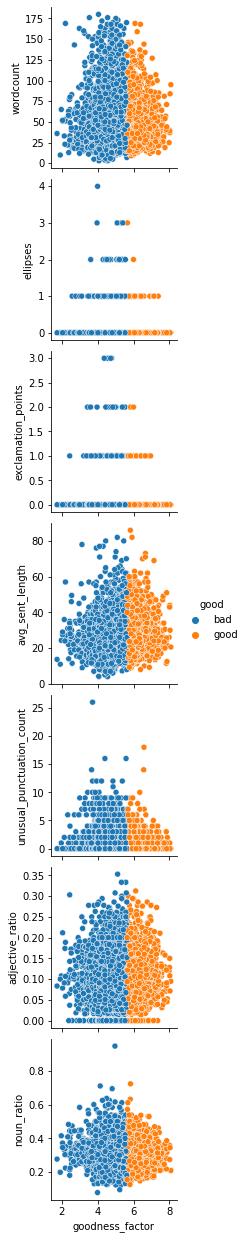

In [47]:
sns.pairplot(data_eda, hue='good', x_vars='goodness_factor', y_vars=['wordcount', 'ellipses', 'exclamation_points', 'avg_sent_length', 'unusual_punctuation_count', 'adjective_ratio', 'noun_ratio'])

In [49]:
data_trimmed.to_json('overview_feature_table.json')
data_trimmed.to_csv('overview_feature_table.csv')